In [2]:
!pip install opencc-python-reimplemented
!wget https://dumps.wikimedia.org/zhwiki/20200301/zhwiki-20200301-pages-articles-multistream1.xml-p1p162886.bz2



from gensim.corpora import WikiCorpus

wiki_corpus = WikiCorpus('zhwiki-20200301-pages-articles-multistream1.xml-p1p162886.bz2', dictionary={})
next(iter(wiki_corpus.get_texts()))[:10]

text_num = 0

with open('wiki_text.txt', 'w', encoding='utf-8') as f:
    for text in wiki_corpus.get_texts():
        f.write(' '.join(text)+'\n')
        text_num += 1
        if text_num % 10000 == 0:
            print('{} articles processed.'.format(text_num))

    print('{} articles processed.'.format(text_num))

import jieba
from opencc import OpenCC


# Initial
cc = OpenCC('s2t')
train_data = open('wiki_text.txt', 'r', encoding='utf-8').read()
train_data = cc.convert(train_data)
train_data = jieba.lcut(train_data)
train_data = [word for word in train_data if word != '']
train_data = ' '.join(train_data)
open('seg.txt', 'w', encoding='utf-8').write(train_data)

from gensim.models import word2vec


# Settings
seed = 666
sg = 0
window_size = 10
vector_size = 100
min_count = 1
workers = 8
epochs = 5
batch_words = 10000

train_data = word2vec.LineSentence('seg.txt')
model = word2vec.Word2Vec(
    train_data,
    min_count=min_count,
    size=vector_size,
    workers=workers,
    iter=epochs,
    window=window_size,
    sg=sg,
    seed=seed,
    batch_words=batch_words
)

model.save('word2vec.model')


from gensim.models import word2vec

string = 'å¾®ç”Ÿç‰©'
model = word2vec.Word2Vec.load('word2vec.model')
print(string)

for item in model.wv.most_similar(string):
    print(item)


KeyboardInterrupt: ignored

In [4]:
!wget https://raw.githubusercontent.com/joshhu/must_examples/master/my_seg_small.txt


import sys
from gensim.models import word2vec
from gensim import models

sentences = word2vec.LineSentence("my_seg_small.txt")
model = word2vec.Word2Vec(sentences, size=5, min_count=1, negative=10)

model.save('word2vec.model')
model.wv.save_word2vec_format('word2vec.model', binary = False)
print('done')


input_str = "åŒ—äº¬"
res = model.wv.most_similar(input_str)
for item in res: 
      print(item[0] + ':' + str(item[1]))

--2020-04-23 02:04:49--  https://raw.githubusercontent.com/joshhu/must_examples/master/my_seg_small.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 398 [text/plain]
Saving to: ‘my_seg_small.txt.1’

my_seg_small.txt.1  100%[===================>]     398  --.-KB/s    in 0s      

2020-04-23 02:04:49 (83.8 MB/s) - ‘my_seg_small.txt.1’ saved [398/398]

done


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


KeyError: ignored

[5.00000000e+00 2.00000000e+00 8.00000000e-01 3.20000000e-01
 1.28000000e-01 5.12000000e-02 2.04800000e-02 8.19200000e-03
 3.27680000e-03 1.31072000e-03 5.24288000e-04 2.09715200e-04
 8.38860800e-05 3.35544320e-05 1.34217728e-05 5.36870912e-06]


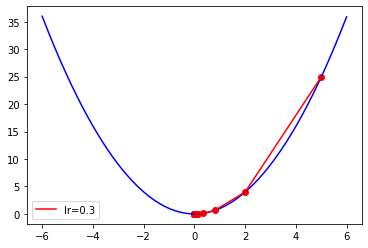

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 目標函數:y=x^2
def func(x): return np.square(x)

# 目標函數一階導數:dy/dx=2*x
def dfunc(x): return 2 * x

def GD(x_start, df, epochs, lr):    
    """  梯度下降法。給定起始點與目標函數的一階導函數，求在epochs次反覆運算中x的更新值
        :param x_start: x的起始點    
        :param df: 目標函數的一階導函數    
        :param epochs: 反覆運算週期    
        :param lr: 學習率    
        :return: x在每次反覆運算後的位置（包括起始點），長度為epochs+1    
     """    
    xs = np.zeros(epochs+1)    
    x = x_start    
    xs[0] = x    
    for i in range(epochs):         
        dx = df(x)        
        # v表示x要改變的幅度        
        v = - dx * lr        
        x += v        
        xs[i+1] = x    
    return xs

# Main
# 起始權重
x_start = 5    
# 執行週期數
epochs = 15 
# 學習率   
lr = 0.3   
# 梯度下降法 
x = GD(x_start, dfunc, epochs, lr=lr) 
print (x)
# 輸出：[-5.     -2.     -0.8    -0.32   -0.128  -0.0512]

color = 'r'    
#plt.plot(line_x, line_y, c='b')    
from numpy import arange
t = arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c='b')
plt.plot(x, func(x), c=color, label='lr={}'.format(lr))    
plt.scatter(x, func(x), c=color, )    
plt.legend()

plt.show()

In [6]:
import keras
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
data = np.random.random((1000, 10)) #隨機產生1000筆資料，每筆資料1包含十個float數字
labels = np.random.randint(2, size=(1000, 1)) #隨機產生1000筆資料，每筆資料上限為2(意思就是0 或 1)
print(np.shape(data))
print(data[0])
print(np.shape(labels))
print(labels[0])

model = Sequential()
model.add(Dense(32, activation='relu', input_dim=10))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(data, labels, epochs=10, batch_size=32)

score=model.evaluate(data, labels)
print(score[1])

Using TensorFlow backend.


(1000, 10)
[0.93222369 0.62384387 0.06825105 0.31049968 0.20285737 0.92939501
 0.69360192 0.18507981 0.21721298 0.35410896]
(1000, 1)
[0]
Epoch 1/10
1000/1000 [==============================] - 0s 276us/step - loss: 0.6947 - accuracy: 0.4990
Epoch 2/10
1000/1000 [==============================] - 0s 33us/step - loss: 0.6931 - accuracy: 0.5150
Epoch 3/10
1000/1000 [==============================] - 0s 32us/step - loss: 0.6915 - accuracy: 0.5190
Epoch 4/10
1000/1000 [==============================] - 0s 33us/step - loss: 0.6907 - accuracy: 0.5120
Epoch 5/10
1000/1000 [==============================] - 0s 33us/step - loss: 0.6900 - accuracy: 0.5090
Epoch 6/10
1000/1000 [==============================] - 0s 34us/step - loss: 0.6896 - accuracy: 0.5230
Epoch 7/10
1000/1000 [==============================] - 0s 34us/step - loss: 0.6890 - accuracy: 0.5220
Epoch 8/10
1000/1000 [==============================] - 0s 34us/step - loss: 0.6887 - accuracy: 0.5360
Epoch 9/10
1000/1000 [===============

In [7]:

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

# Generate dummy data
import numpy as np
x_train = np.random.random((1000, 10))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(1000, 1)), num_classes=10)
x_test = np.random.random((100, 10))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)

model = Sequential()
model.add(Dense(64, activation='relu', input_dim=10))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20, batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128)
print(score)

Epoch 1/20
1000/1000 [==============================] - 0s 72us/step - loss: 2.3133 - accuracy: 0.0990
Epoch 2/20
1000/1000 [==============================] - 0s 16us/step - loss: 2.3079 - accuracy: 0.1030
Epoch 3/20
1000/1000 [==============================] - 0s 16us/step - loss: 2.3031 - accuracy: 0.1050
Epoch 4/20
1000/1000 [==============================] - 0s 14us/step - loss: 2.2994 - accuracy: 0.1060
Epoch 5/20
1000/1000 [==============================] - 0s 14us/step - loss: 2.2972 - accuracy: 0.1140
Epoch 6/20
1000/1000 [==============================] - 0s 13us/step - loss: 2.2955 - accuracy: 0.1100
Epoch 7/20
1000/1000 [==============================] - 0s 13us/step - loss: 2.2941 - accuracy: 0.1160
Epoch 8/20
1000/1000 [==============================] - 0s 13us/step - loss: 2.2930 - accuracy: 0.1150
Epoch 9/20
1000/1000 [==============================] - 0s 13us/step - loss: 2.2920 - accuracy: 0.1090
Epoch 10/20
1000/1000 [==============================] - 0s 14us/step - l

In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

model = Sequential()
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

import tensorflow as tf
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/5
60000/60000 [==============================] - 13s 212us/step - loss: 0.2209 - accuracy: 0.9340
Epoch 2/5
60000/60000 [==============================] - 12s 207us/step - loss: 0.0959 - accuracy: 0.9704
Epoch 3/5
60000/60000 [==============================] - 12s 207us/step - loss: 0.0671 - accuracy: 0.9785
Epoch 4/5
60000/60000 [==============================] - 12s 208us/step - loss: 0.0540 - accuracy: 0.9831
Epoch 5/5
10000/10000 [==============================] - 1s 54us/step


[0.06221421074162936, 0.9811999797821045]